/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks
/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/images/trex.png


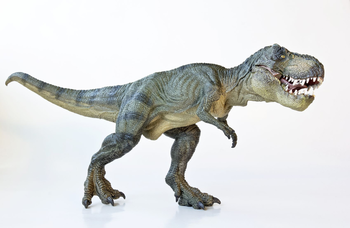

(228, 350, 3)

In [1]:
# USAGE
# python blurring.py --image ../images/beach.png
import os
import argparse
import pathlib
from typing import Union, Any

import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display
# Import the necessary packages
from matplotlib import pyplot as plt

# Construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

args = {}

current_folder = pathlib.Path(
    f"/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks")
print(current_folder)

# # Calculating path to the input data
args["image"] = pathlib.Path(
    f"{current_folder.parent}/images/trex.png").resolve()

print(args["image"])

assert args["image"].exists()

# _image = f"{args['image']}"
image: Union[np.ndarray, Any]
# # # Load the image and show it
image = cv2.imread(f"{args['image']}")


# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
temp_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))

image.shape


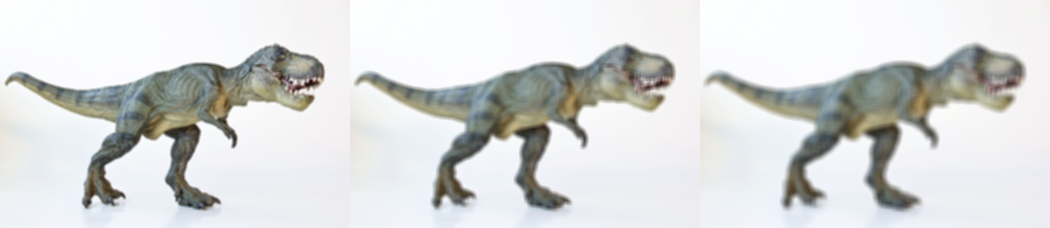

In [3]:
# Let's apply standard "averaging" blurring first. Average
# blurring (as the name suggests), takes the average of all
# pixels in the surrounding area and replaces the centeral
# element of the output image with the average. Thus, in
# order to have a central element, the area surrounding the
# central must be odd. Here are a few examples with varying
# kernel sizes. Notice how the larger the kernel gets, the
# more blurred the image becomes

# k x k sliding window = kernel eg (3,3)
# We call this sliding window a “convolution kernel” or
# just a “kernel”. We’ll continue to use this terminology throughout
# this chapter.
blurred = np.hstack(
    [cv2.blur(image, (3, 3)), cv2.blur(image, (5, 5)), cv2.blur(image, (7, 7))]
)


# Convert the image to grayscale
temp_image = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
# temp_image = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)  # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))

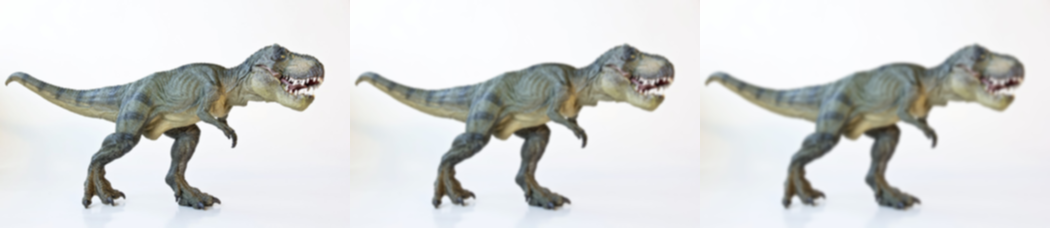

In [4]:
# We can also apply Gaussian blurring, where the relevant
# parameters are the image we want to blur and the standard
# deviation in the X and Y direction. Again, as the standard
# deviation size increases, the image becomes progressively
# more blurred
blurred = np.hstack(
    [
        cv2.GaussianBlur(image, (3, 3), 0),
        cv2.GaussianBlur(image, (5, 5), 0),
        cv2.GaussianBlur(image, (7, 7), 0),
    ]
)


# Convert the image to grayscale
temp_image = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
# temp_image = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)  # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))

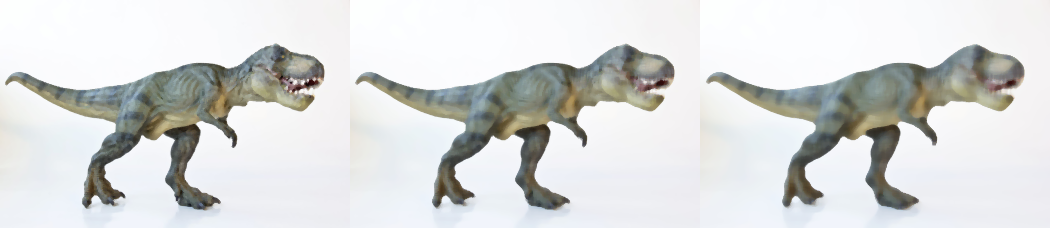

In [5]:
# The cv2.medianBlur function is mainly used for removing
# what is called "salt-and-pepper" noise. Unlike the Average
# method mentioned above, the median method (as the name
# suggests), calculates the median pixel value amongst the
# surrounding area.
blurred = np.hstack(
    [cv2.medianBlur(image, 3), cv2.medianBlur(image, 5), cv2.medianBlur(image, 7)]
)


# Convert the image to grayscale
temp_image = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
# temp_image = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)  # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))

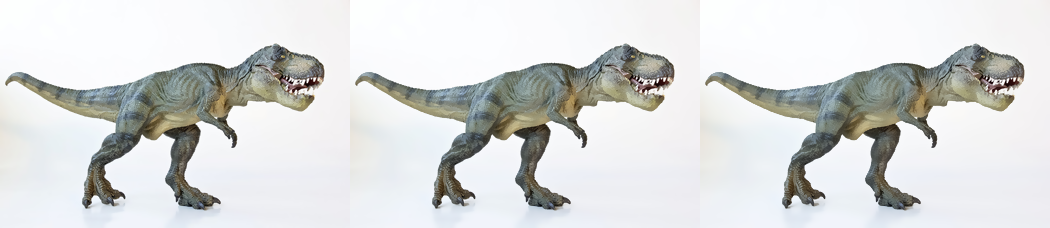

In [6]:
# You may have noticed that blurring can help remove noise,
# but also makes edge less sharp. In order to keep edges
# sharp, we can use bilateral filtering. We need to specify
# the diameter of the neighborhood (as in examples above),
# along with sigma values for color and coordinate space.
# The larger these sigma values, the more pixels will be
# considered within the neighborhood.

# Applying Bilateral blurring to our
# beach image. As the diameter of the
# neighborhood, color s, and space s
# increases (from left to right), our image
# has noise removed, yet still retains
# edges and does not appear to
# be “motion blurred”.

# bilateralFilter: (src, 
# d, 
# sigmaColor, 
# sigmaSpace, (note this is the standard deviation) 
# dst=..., 
# borderType=...) -> Any
blurred = np.hstack(
    [
        cv2.bilateralFilter(image, 5, 21, 21),
        cv2.bilateralFilter(image, 7, 31, 31),
        cv2.bilateralFilter(image, 9, 41, 41),
    ]
)


# Convert the image to grayscale
temp_image = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

# In Pillow, the order of colors is assumed to be RGB (red, green, blue).
# As we are using Image.fromarray() of PIL module, we need to convert BGR to RGB.
# temp_image = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)  # Converting BGR to RGB

# SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
display(Image.fromarray(temp_image))